In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels), (test_images, test_labels)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape((60000,28*28))/255.0
test_images=test_images.reshape((10000,28*28))/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


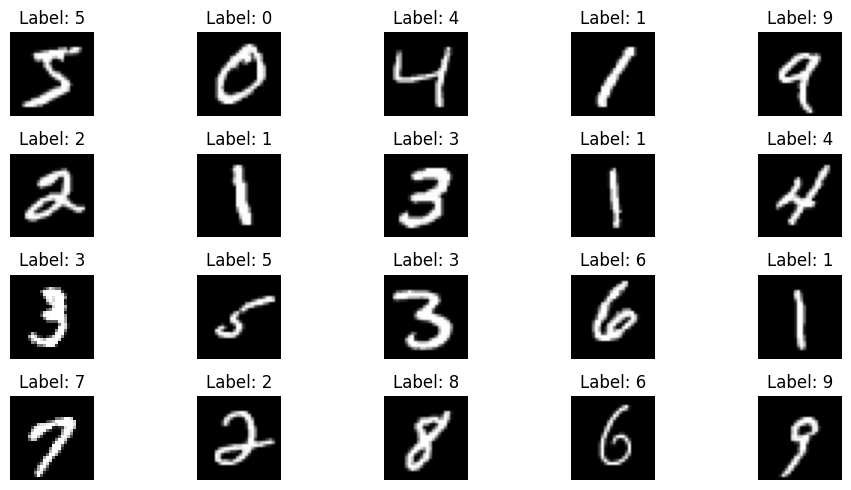

In [3]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')  # Convert 1D back to 2D
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Hide axis for cleaner look

plt.tight_layout()
plt.show()

In [4]:
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [6]:
history=model.fit(train_images, train_labels, epochs=30,batch_size=128,
                  validation_data=(test_images,test_labels))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.8747 - loss: 0.4124 - val_accuracy: 0.9684 - val_loss: 0.1042
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9578 - loss: 0.1331 - val_accuracy: 0.9712 - val_loss: 0.0953
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9705 - loss: 0.0962 - val_accuracy: 0.9760 - val_loss: 0.0753
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9741 - loss: 0.0812 - val_accuracy: 0.9772 - val_loss: 0.0769
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9763 - loss: 0.0710 - val_accuracy: 0.9800 - val_loss: 0.0665
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9785 - loss: 0.0653 - val_accuracy: 0.9811 - val_loss: 0.0626
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9811 - loss: 0.0562 - val_accuracy: 0.9798 - val_loss: 0.0671
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9828 - loss: 0.0519 - 

In [7]:
test_loss,test_acc=model.evaluate(test_images, test_labels)
print(f"\n Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9833 - loss: 0.0717

 Test accuracy: 0.9869


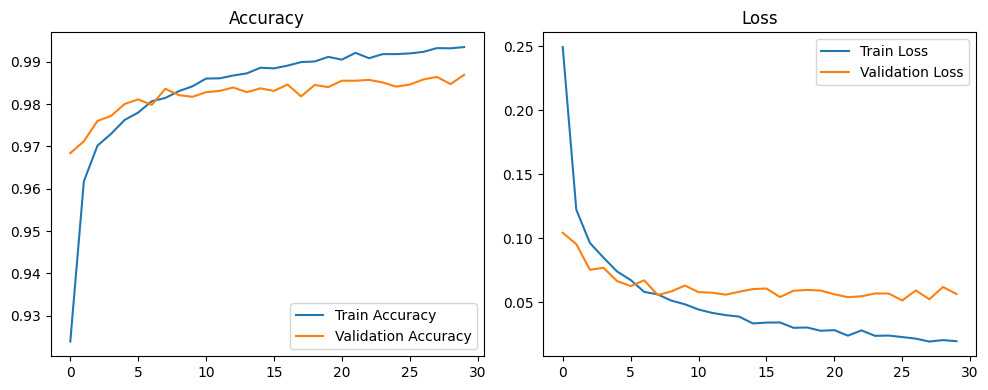

In [8]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


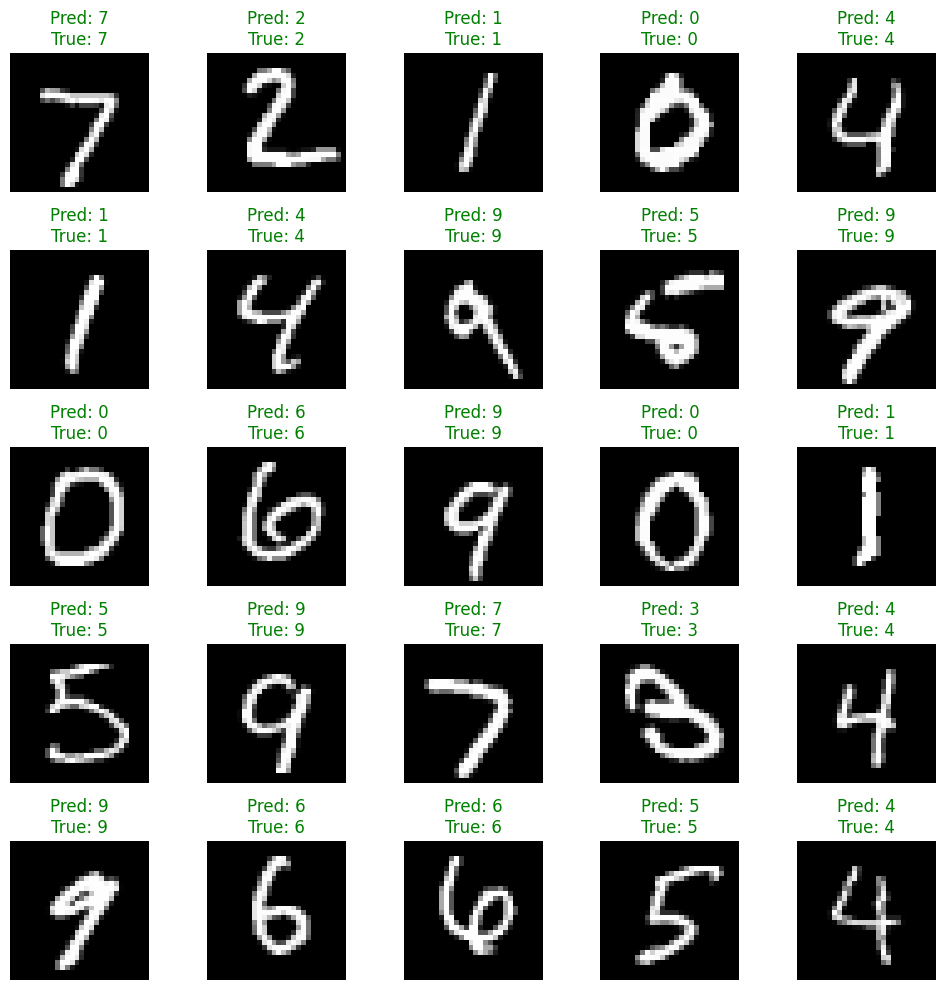

In [9]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()